In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


# PyTesseract Setup

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import pytesseract
import shutil
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from skimage.io import imread
try:
 from PIL import Image
except ImportError:
 import Image

# Loading an image


In [ ]:
#function to plot the image
def plot_image(image, title=""):
  plt.imshow(image), plt.title(title, size=14), plt.axis('off')

In [ ]:
# Loads image into Memory and convert to RGB format
def load_image(p):
  img=cv2.imread(p)
  # img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert BGR TO RGB
  img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  kernel = np.ones((1, 1), np.uint8)
  img = cv2.dilate(img, kernel, iterations=2)
  img = cv2.erode(img, kernel, iterations=2)
  return img
# "/gdrive/My Drive/Mini Project/Images/Image69.jpg"

In [ ]:
def load_input_paths(dirpath):
  dir_files = os.listdir(dirpath)
  return [(f"{dirpath}{fname}") for fname in dir_files]

/content/drive/My Drive/Mini Project/Images/Image1.jpg
/content/drive/My Drive/Mini Project/Images/Image2.jpg
/content/drive/My Drive/Mini Project/Images/Image3.jpg
/content/drive/My Drive/Mini Project/Images/Image4.jpg
/content/drive/My Drive/Mini Project/Images/Image5.jpg
/content/drive/My Drive/Mini Project/Images/Image69.png
/content/drive/My Drive/Mini Project/Images/Image69.jpg


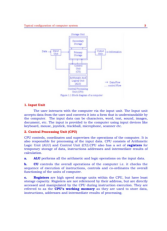

In [ ]:
for imgPath in load_input_paths("/content/drive/My Drive/Mini Project/Images/"):
  print(imgPath)
  plot_image(load_image(imgPath),'')


# Extract Text from image

Extracted Text:

 

‘Steam exists in following states or types or conditions.

(Wet steam: When steam contains water particles then it is known as Wet steam

Gi) Dry steam (dry saturated steam): When wet steam is further heated then all water particles
get converted into vapour and resulted steam is called dry steam.

ii)

Superheated steam: When dry saturated steam is heated to higher temperatures then steam

‘obtained is in superheated state. This steam is mostly used in Power generation,

Dryness Fraction of Saturated Steam (x or q) It is a measure of quality of wet steam. It is the ratio

of the mass of dry steam (mg) to the mass of total wet steam (mg +mf), where mf is the mass of
water vapor.

—————_—
ururaj Lalagi, Asst Prof.,Dept. of Mechanical Engg. RIT Bangalore

Page 3



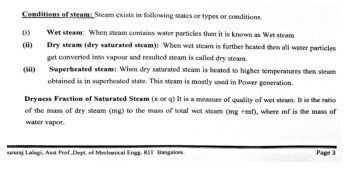

In [ ]:
# '/gdrive/My Drive/Mini Project/inference_blocks/test3.png'

#@title Enter file path here { display-mode: "form" }
filepath = "/content/drive/My Drive/Mini Project/inference_blocks/test3.png"#@param {type:"string"}
img = load_image(filepath)
plot_image(img)
extracted_text = pytesseract.image_to_string(img) 
print("Extracted Text:\n")
print(extracted_text)